# Example 2 - MNIST with a Shallow Feedforward Network
We will use a shallow feedforward neural network to learn the famous MNIST dataset.

First, as usual, we import Numpy to hold the data, and we import Learny McLearnface.

In [56]:
import numpy as np
import LearnyMcLearnface as lml
import matplotlib.pyplot as plt
%matplotlib inline

Now, we will set up the MNIST dataset.  This dataset consists of a training set of 60,000 28x28 images of handwritten digits, along with a test set of 10,000 different images of the same size.  We will use a built-in utility to import the data.

Since these images are 28x28 grayscale pixels, they will be stretched into single dimensional vectors of length 784.
Then, the training and test image sets are combined into one large matrix each, where each row is a single 784 image.

There are also two vectors of image classifications (lengths 60,000 and 10,000) which correspond to these two matrices.


In [57]:
training_images, training_labels, test_images, test_labels = lml.utils.get_mnist()

Let's visualize some of the elements of this dataset, organized by class.

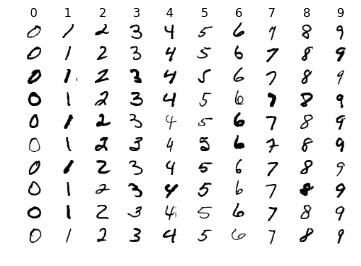

In [59]:
classes = range(10)
for i in classes:
    idxs = np.flatnonzero(training_labels == i)
    idxs = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(idxs):
        plt_idx = j * 10 + i + 1
        plt.subplot(10, 10, plt_idx)
        reshaped = training_images[idx].reshape((28, 28))
        plt.imshow(reshaped, cmap=plt.cm.binary)
        plt.axis('off')
        if j == 0:
            plt.title(i)

It is common to have separate validation and test sets, so we will split MNIST's test set in half to accomodate this. The first 5000 images will be our validation set, and the rest will be our test set.

In [60]:
X_train = training_images
y_train = training_labels
X_val = test_images[:5000, :]
y_val = test_labels[:5000]
X_test = test_images[5000:, :]
y_test = test_labels[5000:]

Now, we wrap our training and validation sets in a dictionary as usual, so that we may feed it to Learny McLearnface.

In [61]:
data = {
    'X_train' : X_train,
    'y_train' : y_train,
    'X_val' : X_val,
    'y_val' : y_val
}

Now we will create our model. We will use a similar architecture to Example 1: a shallow fully-connected network with 500 hidden layer neurons, ReLU activations, and a Softmax classifier.

Since this network will be taking 28x28 images, its input dimension will be 28*28. We will use the Xavier scheme to initialize our parameters.

In [62]:
opts = {
    'input_dim' : 28*28,
    'init_scheme' : 'xavier'
}

And then we build the model.

In [63]:
nn = lml.NeuralNetwork(opts)
nn.add_layer('Affine', {'neurons':600})
nn.add_layer('ReLU', {})
nn.add_layer('Affine', {'neurons':10})
nn.add_layer('SoftmaxLoss', {})

Like before, we will use a Trainer in order to fit the model to the MNIST dataset. We will use stochastic gradient descent, and we will use a learning rate of 1e-2 and a regularization constant of 1e-8. We will also train the model for 10 epochs.

In [64]:
opts = {
    'update_options' : {'update_rule' : 'sgd', 'learning_rate' : 1e-2},
    'reg_param' : 1e-8,
    'num_epochs' : 10
}

We then use a Trainer object in order to train the model to the data, with the chosen options.

In [65]:
trainer = lml.Trainer(nn, data, opts)

We will evaluate the model once before training. Since the model is randomly initialized, we will expect the model's predictions to be essentially random as well. As there are 10 classes, we will expect an initial accuracy roughly near 10%.

In [66]:
accuracy = trainer.accuracy(X_val, y_val)
print('Initial model accuracy:', accuracy)

Initial model accuracy: 0.1356


Now, we train the model.

In [67]:
trainer.train()

C:\Users\Owner\Documents\Programs\Python\Deep-Learning\LearnyMcLearnface\Layers\SoftmaxLossLayer.py:26: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-np.log(probabilities[(range(N), y)])) / N


Epoch 1 of 10 Validation accuracy: 0.8678
Epoch 2 of 10 Validation accuracy: 0.8592
Epoch 3 of 10 Validation accuracy: 0.9122
Epoch 4 of 10 Validation accuracy: 0.915
Epoch 5 of 10 Validation accuracy: 0.9226
Epoch 6 of 10 Validation accuracy: 0.9278
Epoch 7 of 10 Validation accuracy: 0.9244
Epoch 8 of 10 Validation accuracy: 0.9306
Epoch 9 of 10 Validation accuracy: 0.9322
Epoch 10 of 10 Validation accuracy: 0.931


And then, we print the final test set accuracy. With the hyperparameters we used earlier, we can expect a test set accuracy of roughly 92-95%. It is clear that the model has fit the dataset pretty well. However, with a bit of hyperparameter optimization, it can do even better. Feel free to experiment with the hyperparameter values, and try to beat our final accuracy!

In [68]:
accuracy = trainer.accuracy(X_test, y_test)
print('Initial model accuracy:', accuracy)

Initial model accuracy: 0.9628


Let's do a formal classification of our test data. We use the Evaluator class for use of the network after the training has completed.

In [69]:
evaluator = lml.Evaluator(nn, X_test)
predicted_classes, confidences = evaluator.predict()

Now that we have class predictions from our test set, we can visualize how the network is classifying images. We will display a few of these test images, organized by what class the network predicts it belongs to. As such, any errors in the display represent the model's classification errors.

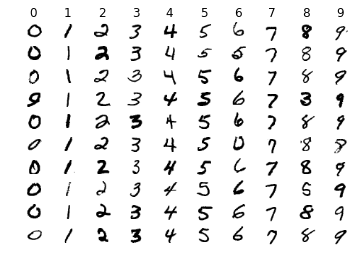

In [72]:
classes = range(10)
for i in classes:
    idxs = np.flatnonzero(predicted_classes == i)
    idxs = np.random.choice(idxs, 10, replace=False)
    for j, idx in enumerate(idxs):
        plt_idx = j * 10 + i + 1
        plt.subplot(10, 10, plt_idx)
        reshaped = X_test[idx].reshape((28, 28))
        plt.imshow(reshaped, cmap=plt.cm.binary)
        plt.axis('off')
        if j == 0:
            plt.title(i)